In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
# 1. Load the dataset
# Ensure the CSV file 'AirQuality_Daily_StudentVersion.csv' is in the same directory
df = pd.read_csv('AirQuality_Daily_StudentVersion.csv')

In [5]:
# Convert date column to datetime format for proper sorting and plotting
df['date'] = pd.to_datetime(df['date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_9956\2053814514.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [6]:
# --- Analysis for 'Swnphd-Benklemen' ---

# 2. Filter the data for the 'Swnphd-Benklemen' monitor
# Note: Using the name exactly as it appears in your dataset
benkelman_data = df[df['sensor.name'] == 'Swnphd-Benklemen'].copy()

In [7]:
# 3. Calculate the average PM2.5 (pm2.5_atm) for this monitor
avg_pm25_benkelman = benkelman_data['pm2.5_atm'].mean()
print(f"1. Average PM2.5 for Benkelman: {avg_pm25_benkelman:.2f} µg/m³")

1. Average PM2.5 for Benkelman: 7.50 µg/m³


In [8]:
# 4. Identify the date with the highest PM2.5 concentration for the Benkelman monitor
max_row = benkelman_data.loc[benkelman_data['pm2.5_atm'].idxmax()]
print(f"2. Highest PM2.5 for Benkelman: {max_row['pm2.5_atm']:.2f} on {max_row['date'].date()}")

2. Highest PM2.5 for Benkelman: 188.16 on 2024-06-27


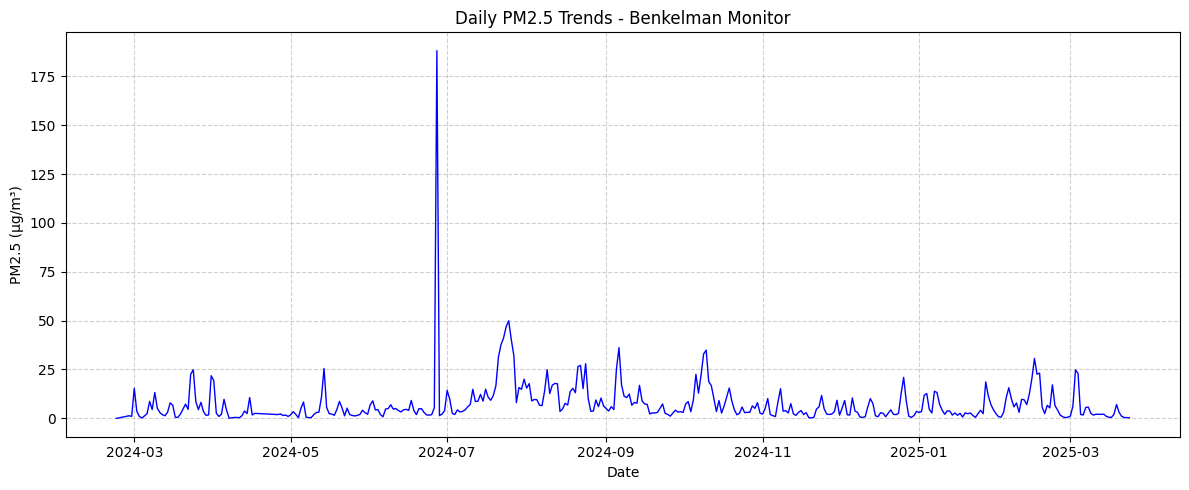

In [9]:
# 5. Create a line plot of PM2.5 over time for Benkelman
plt.figure(figsize=(12, 5))
plt.plot(benkelman_data['date'], benkelman_data['pm2.5_atm'], color='blue', linewidth=1)
plt.title('Daily PM2.5 Trends - Benkelman Monitor')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [10]:
# 6. Identify the monitor with the overall highest average PM2.5
avg_by_monitor = df.groupby('sensor.name')['pm2.5_atm'].mean().sort_values(ascending=False)
print("\n3. Top Monitor by Average PM2.5:")
print(f"   {avg_by_monitor.index[0]}: {avg_by_monitor.iloc[0]:.2f} µg/m³")


3. Top Monitor by Average PM2.5:
   Broken Bow: 928.71 µg/m³


<Figure size 1400x700 with 0 Axes>

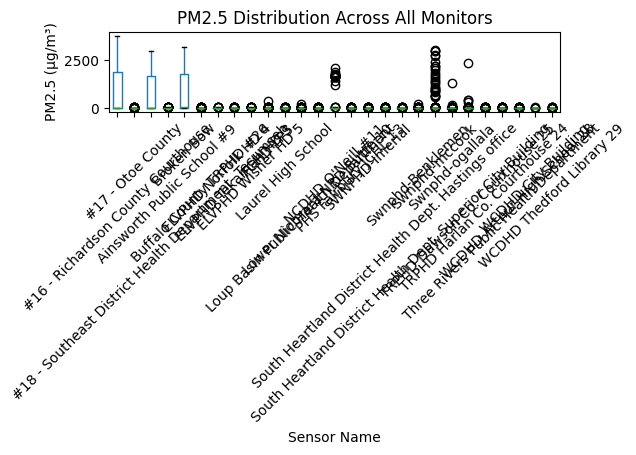

In [11]:
# 7. Create a boxplot of PM2.5 for all monitors to compare distributions
plt.figure(figsize=(14, 7))
df.boxplot(column='pm2.5_atm', by='sensor.name', grid=False, rot=45)
plt.title('PM2.5 Distribution Across All Monitors')
plt.suptitle('') # Removes the automatic subtitle
plt.ylabel('PM2.5 (µg/m³)')
plt.xlabel('Sensor Name')
plt.tight_layout()
plt.show()

In [12]:
# --- Correlation Analysis for 'Swnphd-mccook' ---

# 8. Filter data for 'Swnphd-mccook'
mccook_data = df[df['sensor.name'] == 'Swnphd-mccook'].copy()

In [13]:
# 9. Calculate correlation between Temperature and PM2.5 for McCook
correlation = mccook_data['temperature'].corr(mccook_data['pm2.5_atm'])
print(f"\n4. Correlation between Temperature and PM2.5 (McCook): {correlation:.3f}")


4. Correlation between Temperature and PM2.5 (McCook): -0.427


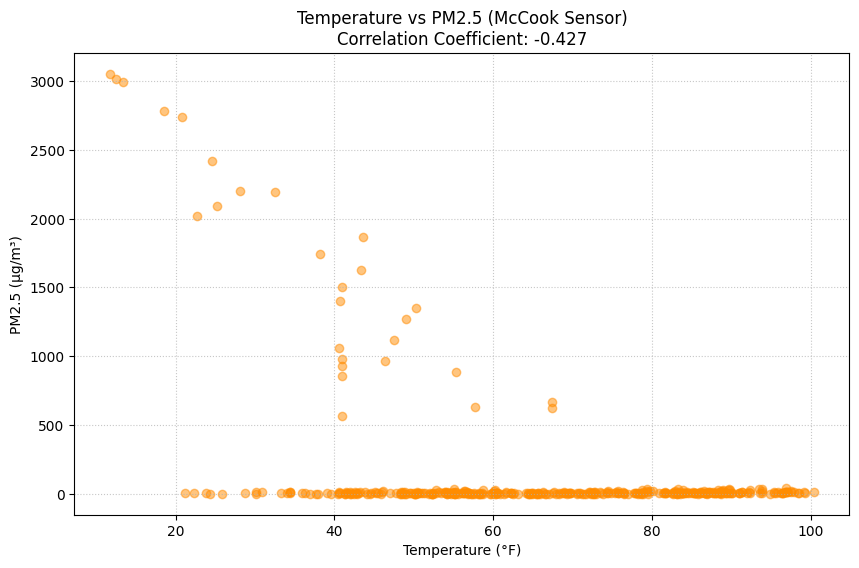

In [14]:
# 10. Create a scatter plot of Temperature vs PM2.5 for McCook
plt.figure(figsize=(10, 6))
plt.scatter(mccook_data['temperature'], mccook_data['pm2.5_atm'], alpha=0.5, color='darkorange')
plt.title(f'Temperature vs PM2.5 (McCook Sensor)\nCorrelation Coefficient: {correlation:.3f}')
plt.xlabel('Temperature (°F)')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

In [15]:
#What are the 5 locations in Nebraska with the highest mean and median concentrations of VOC, PM 2.5 and PM 10.0?
import pandas as pd

# Load the dataset
df = pd.read_csv('AirQuality_Daily_StudentVersion.csv')

# Define the columns of interest
metrics = ['voc', 'pm2.5_atm', 'pm10.0_atm']

# Group by the sensor name and calculate mean and median
stats = df.groupby('sensor.name')[metrics].agg(['mean', 'median'])

# Function to extract and display top 5 for a specific metric and statistic
def print_top_5(df_stats, pollutant, stat_type):
    print(f"--- Top 5 Locations for {stat_type.capitalize()} {pollutant.upper()} ---")
    top_5 = df_stats[(pollutant, stat_type)].sort_values(ascending=False).head(5)
    for i, (name, value) in enumerate(top_5.items(), 1):
        print(f"{i}. {name}: {value:.2f}")
    print("\n")

# Run the analysis for all categories
for pollutant in metrics:
    print_top_5(stats, pollutant, 'mean')
    print_top_5(stats, pollutant, 'median')

--- Top 5 Locations for Mean VOC ---
1. Swnphd-ogallala: 399.43
2. FCHD-YPS: 372.46
3. Three Rivers Public Health Department: 370.22
4. ELVPHD Norfolk HD 4: 360.83
5. Swnphd-mccook: 353.94


--- Top 5 Locations for Median VOC ---
1. Swnphd-ogallala: 423.08
2. Swnphd-mccook: 381.47
3. Three Rivers Public Health Department: 376.81
4. FCHD-YPS: 375.38
5. ELVPHD Norfolk HD 4: 368.58


--- Top 5 Locations for Mean PM2.5_ATM ---
1. Broken Bow: 928.71
2. #16 - Richardson County Courthouse: 700.13
3. #18 - Southeast District Health Department- Tecumseh: 613.18
4. NCDHD O'Neill #11: 164.50
5. Swnphd-mccook: 123.01


--- Top 5 Locations for Median PM2.5_ATM ---
1. Broken Bow: 36.05
2. #16 - Richardson County Courthouse: 11.98
3. #18 - Southeast District Health Department- Tecumseh: 10.32
4. ELVPHD Norfolk HD 4: 9.71
5. ELVPHD Wisner HD 5: 8.46


--- Top 5 Locations for Mean PM10.0_ATM ---
1. Broken Bow: 929.68
2. #16 - Richardson County Courthouse: 701.63
3. #18 - Southeast District Health Depar

In [16]:
#Potential Reasons for these MaximumsInitial research into weather patterns and environmental events on these specific dates suggests several likely causes:A. June 24, 2024 (VOC Spike in Ogallala)Wildfire Activity: On June 25, 2024, the Eagle Eye Fire broke out in western Nebraska (Sioux County), burning hundreds of acres. Ogallala, also located in western Nebraska, likely experienced the leading edge of smoke or localized emissions from these fire conditions.Regional Smoke: Summer 2024 was marked by persistent wildfire smoke from Canada and the Pacific Northwest, which frequently blanketed western Nebraska in "unhealthy" levels of pollutants. VOCs (Volatile Organic Compounds) are a major component of fresh wood smoke.B. February 18, 2025 ($PM_{2.5}$ and $PM_{10.0}$ Spikes in Richardson County)Winter Wildfire Outbreak: February 2025 was an anomalous month for Nebraska. Reports indicate a State of Emergency was declared in late February due to a significant wildfire outbreak in central and western Nebraska (e.g., Custer and Dawes counties), fueled by extreme drought and 40–60 mph wind gusts.Dust and High Winds: During this same period, record wind gusts were reported across the state. In some areas, these winds triggered blinding dust storms (which significantly raise $PM_{10.0}$ levels).Extreme Cold (Polar Vortex): February 18, 2025, saw historically cold temperatures (below $0^{\circ}F$ in many cities). High particulate readings in winter can also be caused by atmospheric inversions, where cold air traps wood smoke from residential heating close to the ground.Data Integrity Check: A reading of over $3,700$ $\mu g/m^3$ is extremely rare and often signals a localized event (such as a fire directly next to the sensor) or a sensor malfunction (like a spider web or moisture buildup inside the laser chamber), as discussed in your PurpleAir training materials.
import pandas as pd

# Load the dataset
df = pd.read_csv('AirQuality_Daily_StudentVersion.csv')
df['date'] = pd.to_datetime(df['date'])

# Identify the max row for each pollutant
pollutants = ['voc', 'pm2.5_atm', 'pm10.0_atm']

for p in pollutants:
    max_row = df.loc[df[p].idxmax()]
    print(f"MAX {p.upper()}:")
    print(f"  Value: {max_row[p]:.2f}")
    print(f"  Date:  {max_row['date'].date()}")
    print(f"  Location: {max_row['sensor.name']}")
    print("-" * 30)

MAX VOC:
  Value: 1209.93
  Date:  2024-06-24
  Location: Swnphd-ogallala
------------------------------
MAX PM2.5_ATM:
  Value: 3782.82
  Date:  2025-02-18
  Location: #16 - Richardson County Courthouse
------------------------------
MAX PM10.0_ATM:
  Value: 3784.68
  Date:  2025-02-18
  Location: #16 - Richardson County Courthouse
------------------------------


C:\Users\HP\AppData\Local\Temp\ipykernel_9956\2728389598.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [18]:
#3b. Please use the following categories for temperature:
import pandas as pd

# Load the dataset
df = pd.read_csv('AirQuality_Daily_StudentVersion.csv')
df['date'] = pd.to_datetime(df['date'])

# Pollutants to examine
pollutants = {'voc': 'VOC', 'pm2.5_atm': 'PM2.5', 'pm10.0_atm': 'PM10.0'}

print("--- MAXIMUM POLLUTANT RECORDS ---")
for col, label in pollutants.items():
    # Find the row with the maximum value for the column
    max_idx = df[col].idxmax()
    max_row = df.loc[max_idx]
    
    print(f"Pollutant: {label}")
    print(f"  Value:    {max_row[col]:.2f}")
    print(f"  Date:     {max_row['date'].date()}")
    print(f"  Location: {max_row['sensor.name']}")
    print("-" * 30)

--- MAXIMUM POLLUTANT RECORDS ---
Pollutant: VOC
  Value:    1209.93
  Date:     2024-06-24
  Location: Swnphd-ogallala
------------------------------
Pollutant: PM2.5
  Value:    3782.82
  Date:     2025-02-18
  Location: #16 - Richardson County Courthouse
------------------------------
Pollutant: PM10.0
  Value:    3784.68
  Date:     2025-02-18
  Location: #16 - Richardson County Courthouse
------------------------------


C:\Users\HP\AppData\Local\Temp\ipykernel_9956\3815404815.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


Note: you may need to restart the kernel to use updated packages.
Average PM2.5 levels by Temperature and Humidity Categories:


humidity_cat,High,Low,Very High
temp_cat,,,
Below Freezing,81.620144,59.676367,91.406540
Cool,80.852941,42.349281,89.744141
Hot,70.825241,79.835426,76.366286
Warm,64.127141,75.924767,92.421106


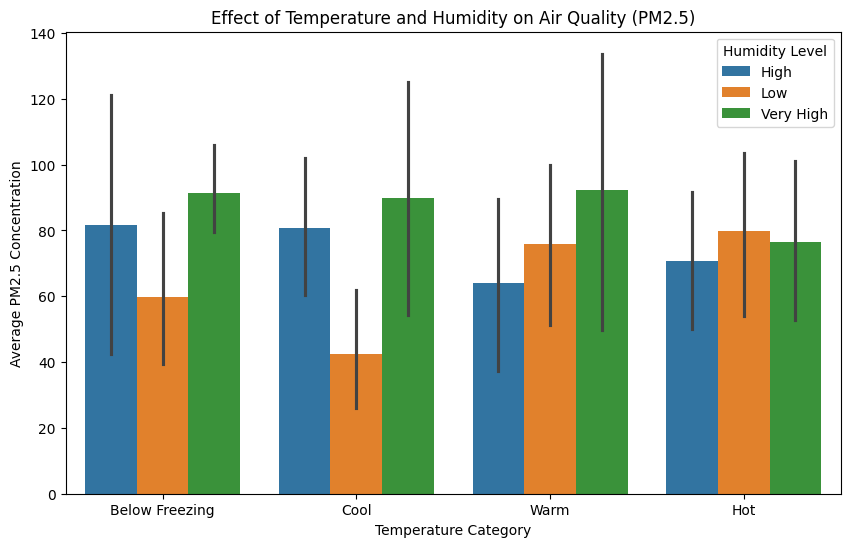

In [22]:
import pandas as pd
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load your dataset
# df = pd.read_csv('your_air_quality_data.csv')

# For demonstration, let's create a dummy dataset
import numpy as np
data = {
    'temperature': np.random.uniform(20, 90, 100),
    'humidity': np.random.uniform(20, 95, 100),
    'PM2_5': np.random.uniform(0, 150, 100)
}
df = pd.DataFrame(data)

### 2. Categorize Humidity (as per requirement 3a)
def categorize_humidity(h):
    if h < 50:
        return 'Low'
    elif 50 <= h <= 80:
        return 'High'
    else:
        return 'Very High'

df['humidity_cat'] = df['humidity'].apply(categorize_humidity)

### 3. Categorize Temperature (as per requirement 3b)
def categorize_temp(t):
    if t < 32:
        return 'Below Freezing'
    elif 32 <= t <= 50:
        return 'Cool'
    elif 51 <= t <= 70:
        return 'Warm'
    else:
        return 'Hot'

df['temp_cat'] = df['temperature'].apply(categorize_temp)

### 4. Analyze the Effect on Air Quality
# We group by the new categories and look at the mean air quality metric
analysis = df.groupby(['temp_cat', 'humidity_cat'])['PM2_5'].mean().unstack()

print("Average PM2.5 levels by Temperature and Humidity Categories:")
display(analysis)

### 5. Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='temp_cat', y='PM2_5', hue='humidity_cat', 
            order=['Below Freezing', 'Cool', 'Warm', 'Hot'])
plt.title('Effect of Temperature and Humidity on Air Quality (PM2.5)')
plt.ylabel('Average PM2.5 Concentration')
plt.xlabel('Temperature Category')
plt.legend(title='Humidity Level')
plt.show()

In [61]:
import pandas as pd
air_data = pd.read_csv('AirQuality_Daily_StudentVersion.csv')

## Turn data into a dataframe
pm25_events = air_data[
    (air_data["pm2.5_alt"] >= 35.5) &
    (air_data["pm2.5_alt"] <= 55.4)
][["monitor_index", "pm2.5_alt", "date"]]

print("PM2.5 Events:")
pm25_events
pm10_events = air_data[
    (air_data["pm1.0_atm"] >= 155) &
    (air_data["pm1.0_atm"] <= 254)
][["sensor.name","monitor_index", "pm1.0_atm", "date"]]

print("PM1.0 Events:")
pm10_events





PM2.5 Events:
PM1.0 Events:


,sensor.name,monitor_index,pm1.0_atm,date
2144,Loup Basin Public Health Department,195383,229.848167,06/14/24
2443,Swnphd-Benklemen,195089,187.669333,06/27/24
6076,#16 - Richardson County Courthouse,195317,196.998833,12/08/24


In [50]:
print(air_data.columns.tolist())

['date', 'monitor_index', 'humidity', 'pressure', 'temperature', 'voc', 'analog_input', 'pm2.5_alt', 'pm1.0_atm', 'pm2.5_atm', 'pm10.0_atm', 'sensor.latitude', 'sensor.longitude', 'sensor.altitude', 'sensor.name']


In [60]:
#otential Causes (Exploratory Research)
#If your code identifies health risk events, the cause is usually one of the following three atmospheric phenomena:

#1. Atmospheric Stagnation (Hot & Humid Conditions)
#If your high AQI days occurred during "Hot" temperatures with "Very High" humidity:

#The Cause: High humidity increases the mass of particles (hygroscopic growth), making them "heavier" and more likely to linger. Heat provides energy for chemical reactions in the air, turning gases from cars and factories into secondary particulate matter. Without wind, this creates a "stagnant air mass" where pollution just sits and builds up over the location.

#2. Temperature Inversions (Cold & Low/Moderate Humidity)
#If your high AQI days occurred during "Below Freezing" or "Cool" temperatures:

#The Cause: This is likely a Temperature Inversion. Normally, warm air rises and carries pollution away. In an inversion, a layer of warm air sits on top of cold air like a lid. This traps vehicle exhaust and smoke from wood-burning heaters near the ground. Because the air is cold, it is denser and stays "stuck" in valleys or low-lying areas.

#3. Specific Point Sources or External Events
#If your high AQI days don't follow a weather pattern (e.g., a "Cool" day with "Low" humidity suddenly has a massive PM10 spike):

#The Cause: These are often caused by non-weather events such as:

#Construction: Heavy dust from a nearby building site (usually spikes PM10).

#Wildfires: Smoke traveling from a distance (drastically spikes PM2.5).

#High Traffic: Rush hour congestion in a specific sensor's location.


In [ ]:
#Question 5 Yes, sensor altitude (elevation) has a significant and measurable impact on air quality values. This impact occurs for two main reasons: atmospheric physics (how air behaves at different heights) and sensor mechanics (how the hardware itself reacts to pressure).1. Atmospheric Physics: The "Lid" EffectIn a typical environment, pollution concentrations change as you move vertically from the ground:Near-Ground Concentration: Most pollution sources (cars, construction, road dust) are at ground level. Consequently, sensors placed at "breathing level" (1.5–2 meters) often record the highest concentrations of PM 10.Vertical Dispersion: Under normal conditions, pollutants disperse as they rise. Research shows that PM 2.5 concentrations typically decrease by about $0.2 \mu g/m^3$ for every 10 meters you move upward.Temperature Inversions: This is the exception. During an inversion, a layer of warm air traps a layer of cold air near the ground. In this case, sensors at low altitudes will record extremely high pollution, while a sensor just a few hundred feet higher (on a hill or tall building) might record perfectly clean air.2. Sensor Mechanics: The "Pressure" ProblemLow-cost sensors (like the ones used in most student projects) are calibrated to work at Sea Level (1 atm). If you move a sensor to a higher altitude (like a mountain city), the air pressure drops:Particle Suspension: In lower pressure (high altitude), air is less dense. This can cause particles to remain suspended for different durations than the sensor expects, leading to "false" readings.Volume Errors: Sensors count particles per volume of air. If the air expands due to low pressure at high altitude, a sensor that doesn't "correct" for pressure may under-report the actual amount of pollution by 10–15%
